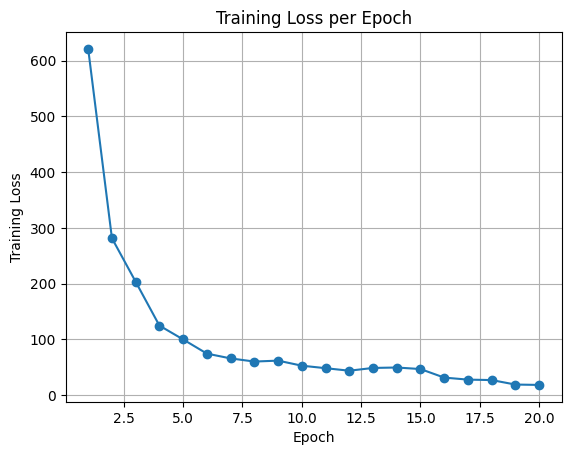

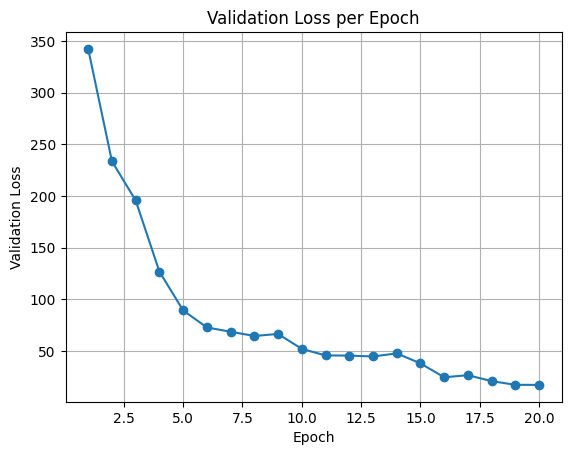

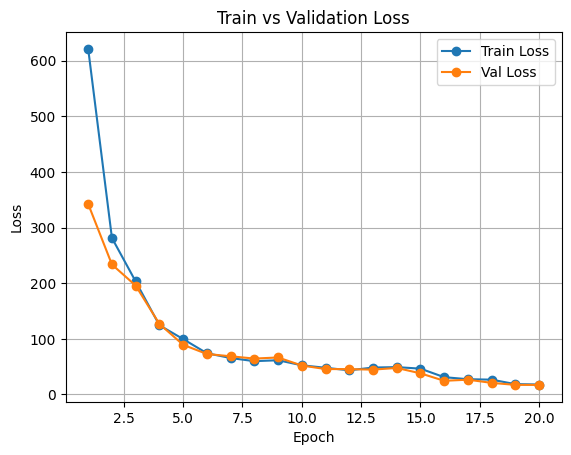

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_individual(df, column, xlabel='Epoch', ylabel=None, title=None, save_as=None):
    plt.figure()
    plt.plot(df['epoch'], df[column], marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel or column)
    plt.title(title or f"{column} vs {xlabel}")
    plt.grid(True)
    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.show()

def plot_merged(df, cols, labels, xlabel='Epoch', ylabel='Loss', title='Train vs Validation Loss', save_as=None):
    plt.figure()
    for col, label in zip(cols, labels):
        plt.plot(df['epoch'], df[col], marker='o', label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.show()

def main():
    # Path to your TXT file
    txt_path = r'C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\Code2\ModularApproach2\artifacts\CombinedRULModel-20250612_014443-NDP\train_val_log.txt'  # replace with your filename

    # Read the TXT into a DataFrame (comma-separated)
    df = pd.read_csv(txt_path, sep=',')
    
    # Ensure epoch is sorted
    df = df.sort_values('epoch')
    
    # Plot train_loss vs epoch
    plot_individual(
        df,
        column='train_loss',
        ylabel='Training Loss',
        title='Training Loss per Epoch'
    )
    
    # Plot val_loss vs epoch
    plot_individual(
        df,
        column='val_loss',
        ylabel='Validation Loss',
        title='Validation Loss per Epoch')
    
    # Plot both curves on one figure
    plot_merged(
        df,
        cols=['train_loss', 'val_loss'],
        labels=['Train Loss', 'Val Loss']
    )

if __name__ == "__main__":
    main()


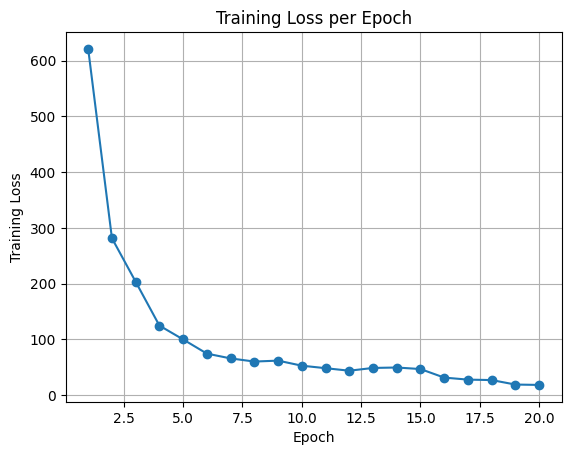

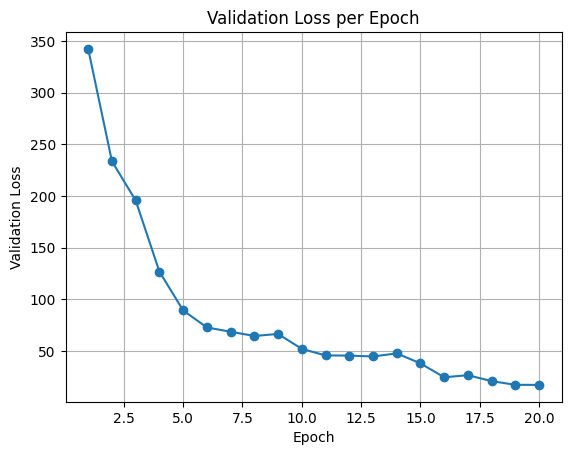

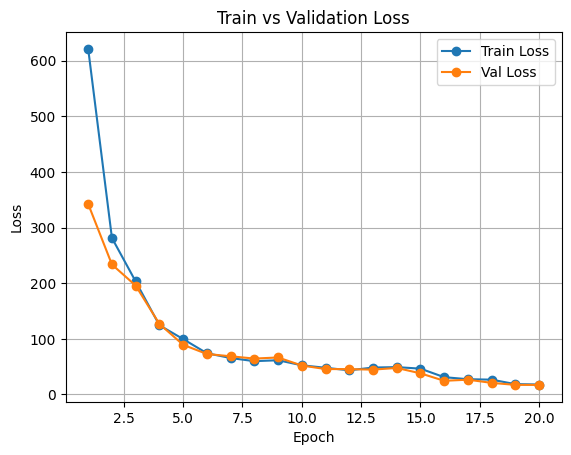

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

DATA = """epoch,train_loss,val_loss
1,621.305531,342.426776
2,281.371230,233.655974
3,203.181877,195.740408
4,124.449682,126.817800
5,99.535682,89.286365
6,74.114156,72.744115
7,65.480687,68.620951
8,59.821500,64.495121
9,61.493601,66.468521
10,52.409705,52.019772
11,47.936053,45.662547
12,43.386004,45.515720
13,48.349436,44.633142
14,49.145746,47.660225
15,46.380296,37.973774
16,31.038651,24.507512
17,27.383596,26.536978
18,26.577066,20.794196
19,18.528558,17.228985
20,17.866240,17.112581
"""

def plot_individual(df, column, ylabel, save_as=None):
    plt.figure()
    plt.plot(df['epoch'], df[column], marker='o')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} per Epoch")
    plt.grid(True)
    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.show()

def plot_merged(df, save_as=None):
    plt.figure()
    plt.plot(df['epoch'], df['train_loss'], marker='o', label='Train Loss')
    plt.plot(df['epoch'], df['val_loss'], marker='o', label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid(True)
    
    plt.show()

def main():
    # Wrap the CSV string in StringIO, then read it
    buf = io.StringIO(DATA)
    df = pd.read_csv(buf)
    df = df.sort_values('epoch')
    
    plot_individual(df, 'train_loss', 'Training Loss')
    plot_individual(df, 'val_loss',   'Validation Loss')
    plot_merged(df)

if __name__ == "__main__":
    main()


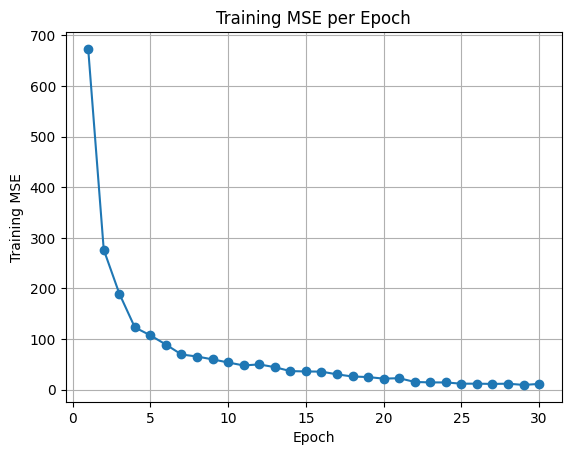

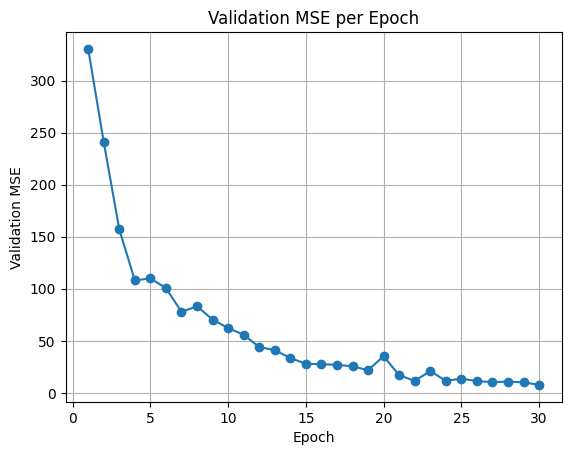

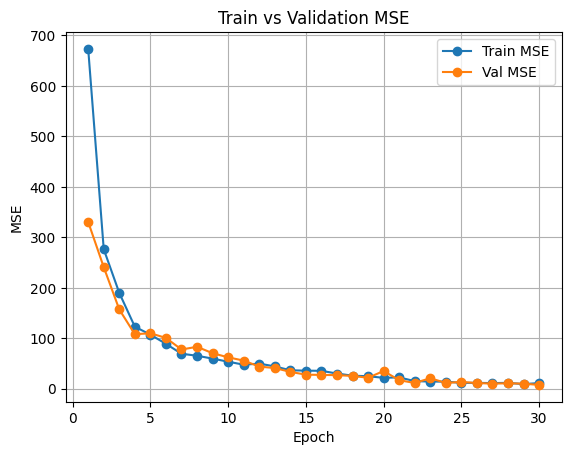

In [ ]:
# w dp

import io
import pandas as pd
import matplotlib.pyplot as plt

DATA = """Epoch 01: Train MSE=673.3950 | Val MSE=330.4682
Epoch 02: Train MSE=276.4918 | Val MSE=240.9506
Epoch 03: Train MSE=189.8815 | Val MSE=157.0687
Epoch 04: Train MSE=122.9282 | Val MSE=108.0317
Epoch 05: Train MSE=107.2079 | Val MSE=110.0140
Epoch 06: Train MSE=88.9814 | Val MSE=100.6719
Epoch 07: Train MSE=69.4105 | Val MSE=77.8066
Epoch 08: Train MSE=65.3884 | Val MSE=83.1501
Epoch 09: Train MSE=59.7466 | Val MSE=70.4588
Epoch 10: Train MSE=53.6056 | Val MSE=62.2484
Epoch 11: Train MSE=47.7209 | Val MSE=55.8182
Epoch 12: Train MSE=49.8218 | Val MSE=43.9452
Epoch 13: Train MSE=44.3309 | Val MSE=41.0273
Epoch 14: Train MSE=36.5965 | Val MSE=33.4456
Epoch 15: Train MSE=35.8714 | Val MSE=27.9582
Epoch 16: Train MSE=35.5418 | Val MSE=27.4602
Epoch 17: Train MSE=30.1292 | Val MSE=26.9639
Epoch 18: Train MSE=25.9049 | Val MSE=25.4671
Epoch 19: Train MSE=24.8121 | Val MSE=21.7611
Epoch 20: Train MSE=21.6805 | Val MSE=35.1867
Epoch 21: Train MSE=22.5381 | Val MSE=16.9433
Epoch 22: Train MSE=15.1177 | Val MSE=11.4949
Epoch 23: Train MSE=14.2384 | Val MSE=20.8956
Epoch 24: Train MSE=14.1366 | Val MSE=11.5176
Epoch 25: Train MSE=11.6843 | Val MSE=13.6021
Epoch 26: Train MSE=11.7293 | Val MSE=11.2904
Epoch 27: Train MSE=11.2131 | Val MSE=10.2642
Epoch 28: Train MSE=11.7135 | Val MSE=10.8116
Epoch 29: Train MSE=9.2493 | Val MSE=10.1103
Epoch 30: Train MSE=11.2425 | Val MSE=7.6010
"""

def parse_data(data):
    rows = []
    for line in data.strip().split("\n"):
        parts = line.split("|")
        epoch = int(parts[0].split()[1].strip(":"))
        train_mse = float(parts[0].split("=")[1])
        val_mse = float(parts[1].split("=")[1])
        rows.append([epoch, train_mse, val_mse])
    return pd.DataFrame(rows, columns=["epoch", "train_mse", "val_mse"])

def plot_individual(df, column, ylabel):
    plt.figure()
    plt.plot(df["epoch"], df[column], marker="o")
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} per Epoch")
    plt.grid(True)
    plt.show()

def plot_merged(df):
    plt.figure()
    plt.plot(df["epoch"], df["train_mse"], marker="o", label="Train MSE")
    plt.plot(df["epoch"], df["val_mse"], marker="o", label="Val MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("Train vs Validation MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    df = parse_data(DATA)
    df = df.sort_values("epoch")
    plot_individual(df, "train_mse", "Training MSE")
    plot_individual(df, "val_mse", "Validation MSE")
    plot_merged(df)

if __name__ == "__main__":
    main()

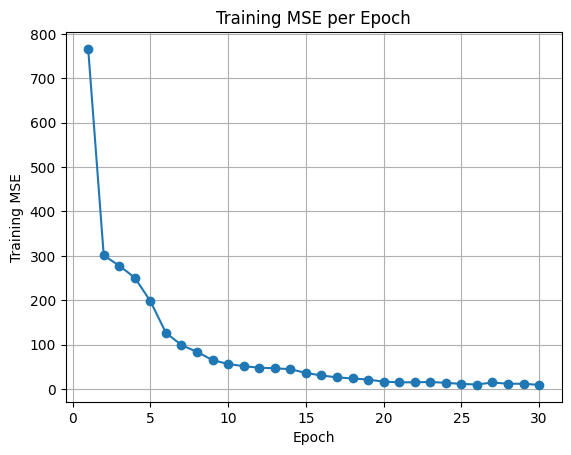

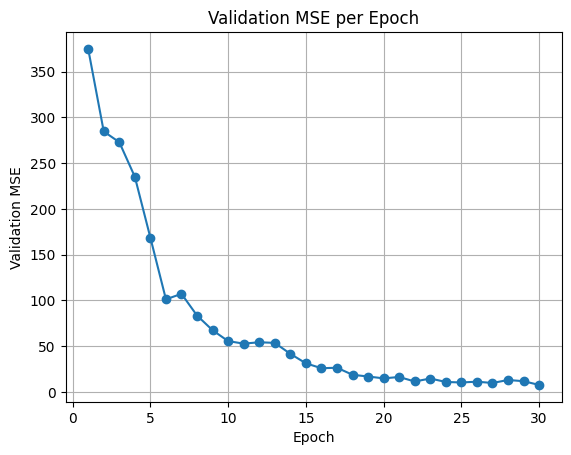

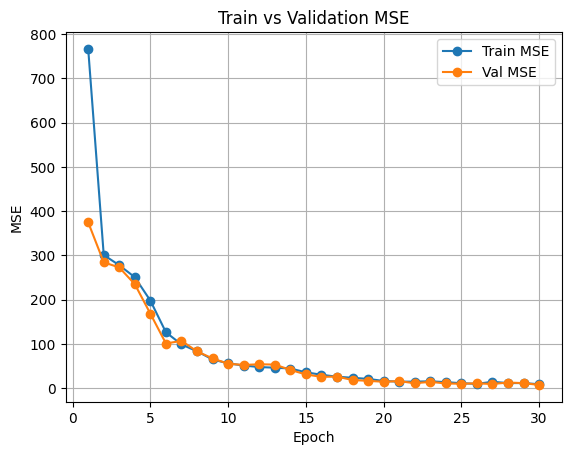

In [ ]:

#wo DP

import io
import pandas as pd
import matplotlib.pyplot as plt

DATA = """Epoch 01: Train MSE=766.2783 | Val MSE=374.6850
Epoch 02: Train MSE=300.9296 | Val MSE=284.5059
Epoch 03: Train MSE=277.8783 | Val MSE=272.8206
Epoch 04: Train MSE=250.6723 | Val MSE=235.0064
Epoch 05: Train MSE=197.9470 | Val MSE=168.4343
Epoch 06: Train MSE=126.4173 | Val MSE=101.1675
Epoch 07: Train MSE=99.0411 | Val MSE=107.1624
Epoch 08: Train MSE=83.6080 | Val MSE=83.4341
Epoch 09: Train MSE=65.0885 | Val MSE=67.3864
Epoch 10: Train MSE=56.3966 | Val MSE=55.5151
Epoch 11: Train MSE=51.4326 | Val MSE=52.7625
Epoch 12: Train MSE=48.0279 | Val MSE=54.2683
Epoch 13: Train MSE=46.6165 | Val MSE=53.5878
Epoch 14: Train MSE=44.6973 | Val MSE=41.6261
Epoch 15: Train MSE=36.1899 | Val MSE=31.2801
Epoch 16: Train MSE=30.5700 | Val MSE=25.8956
Epoch 17: Train MSE=26.2120 | Val MSE=26.4411
Epoch 18: Train MSE=23.7776 | Val MSE=18.7405
Epoch 19: Train MSE=21.2795 | Val MSE=16.8512
Epoch 20: Train MSE=16.5857 | Val MSE=14.8352
Epoch 21: Train MSE=15.0159 | Val MSE=16.3294
Epoch 22: Train MSE=15.0641 | Val MSE=11.4062
Epoch 23: Train MSE=15.8644 | Val MSE=14.6661
Epoch 24: Train MSE=13.9581 | Val MSE=10.9036
Epoch 25: Train MSE=11.5042 | Val MSE=10.3341
Epoch 26: Train MSE=10.1346 | Val MSE=11.2084
Epoch 27: Train MSE=14.7045 | Val MSE=9.7704
Epoch 28: Train MSE=11.8609 | Val MSE=13.0552
Epoch 29: Train MSE=11.8402 | Val MSE=11.7333
Epoch 30: Train MSE=9.2052 | Val MSE=7.6632
"""

def parse_data(data):
    rows = []
    for line in data.strip().split("\n"):
        parts = line.split("|")
        epoch = int(parts[0].split()[1].strip(":"))
        train_mse = float(parts[0].split("=")[1])
        val_mse = float(parts[1].split("=")[1])
        rows.append([epoch, train_mse, val_mse])
    return pd.DataFrame(rows, columns=["epoch", "train_mse", "val_mse"])

def plot_individual(df, column, ylabel):
    plt.figure()
    plt.plot(df["epoch"], df[column], marker="o")
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} per Epoch")
    plt.grid(True)
    plt.show()

def plot_merged(df):
    plt.figure()
    plt.plot(df["epoch"], df["train_mse"], marker="o", label="Train MSE")
    plt.plot(df["epoch"], df["val_mse"], marker="o", label="Val MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("Train vs Validation MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    df = parse_data(DATA)
    df = df.sort_values("epoch")
    plot_individual(df, "train_mse", "Training MSE")
    plot_individual(df, "val_mse", "Validation MSE")
    plot_merged(df)

if __name__ == "__main__":
    main()

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

DATA = """epoch,train_loss,val_loss
1,621.305531,342.426776
2,281.371230,233.655974
3,203.181877,195.740408
4,124.449682,126.817800
5,99.535682,89.286365
6,74.114156,72.744115
7,65.480687,68.620951
8,59.821500,64.495121
9,61.493601,66.468521
10,52.409705,52.019772
11,47.936053,45.662547
12,43.386004,45.515720
13,48.349436,44.633142
14,49.145746,47.660225
15,46.380296,37.973774
16,31.038651,24.507512
17,27.383596,26.536978
18,26.577066,20.794196
19,18.528558,17.228985
20,17.866240,17.112581
"""

def plot_individual(df, column, ylabel, save_as=None):
    plt.figure()
    plt.plot(df['epoch'], df[column], marker='o')
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} per Epoch")
    plt.grid(True)
    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.show()

def plot_merged(df, save_as=None):
    plt.figure()
    plt.plot(df['epoch'], df['train_loss'], marker='o', label='Train Loss')
    plt.plot(df['epoch'], df['val_loss'], marker='o', label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid(True)
    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
    else:
        plt.show()

def main():
    # Wrap the CSV string in StringIO, then read it
    buf = io.StringIO(DATA)
    df = pd.read_csv(buf)
    df = df.sort_values('epoch')
    
    plot_individual(df, 'train_loss', 'Training Loss', save_as='train_loss.png')
    plot_individual(df, 'val_loss',   'Validation Loss', save_as='val_loss.png')
    plot_merged(df, save_as='train_vs_val_loss.png')

if __name__ == "__main__":
    main()
